In [99]:
# # Run these in your terminal in order

# !pip install bertopic

# pip install -r requirements.txt install bertopic

# pip uninstall transformers bertopic
# pip install transformers bertopic

# !pip install spacytextblob
# python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (1587396824.py, line 5)

In [102]:
import pandas as pd

#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import nltk
from nltk.corpus import stopwords
from nltk import ngrams

import re

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from bertopic import BERTopic

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.cluster import KMeans


In [80]:
#Amado's csv to df 

df_comments = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_comments6_LIWC.csv')
df_submissions = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_submissions6_LIWC.csv', low_memory=False)


In [81]:
#Kaily's csv to df

# df_comments = pd.read_csv("C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_comments6_LIWC.csv" )
# df_submissions = pd.read_csv('C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_submissions6_LIWC.csv', low_memory = False)


In [82]:
#Structure of Comments dataset
df_comments.head()

,author,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,WPS,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,BoofDontShoot,1659067065,1,opiates,5,8.69,50.00,1.00,25.77,2.50,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
1,Busy_Background_195,1659067044,1,opiates,55,32.58,13.76,14.10,1.00,13.75,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5.45,3.64,0.0
2,Wolf_Double,1659066949,1,opiates,6,1.00,95.20,23.51,99.00,6.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
3,Knowagoraaa,1659066905,1,opiates,39,71.92,60.13,99.00,73.64,13.00,...,0.0,0.0,0.0,0.0,0.0,2.56,0.00,5.13,0.00,0.0
4,Busy_Background_195,1659066875,1,opiates,75,24.37,29.68,14.56,2.41,25.00,...,0.0,0.0,0.0,0.0,0.0,0.00,2.67,4.00,0.00,0.0


In [64]:
#Structure of Submissions dataset
df_submissions.head()

,author,title,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,1.659067e+09,1,opiates,12.0,18.82,79.76,1.79,25.77,...,0.0,0.0,0.00,8.33,0.00,0.00,0.0,0.0,16.67,0.00
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,1.659065e+09,1,opiates,5.0,99.00,50.00,1.00,25.77,...,0.0,0.0,0.00,20.00,0.00,0.00,0.0,0.0,0.00,40.00
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,1.659064e+09,1,opiates,5.0,93.26,50.00,43.37,25.77,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,20.00
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,1.659063e+09,1,opiates,13.0,82.82,93.79,94.81,99.00,...,0.0,0.0,7.69,0.00,15.38,0.00,0.0,0.0,15.38,7.69
4,Downtown_Syrup4635,IOP Detox while working 9-5??,1.659061e+09,1,opiates,6.0,62.04,50.00,23.51,25.77,...,0.0,0.0,0.00,33.33,0.00,16.67,0.0,0.0,0.00,0.00


In [83]:
#Removing null values
print(len(df_comments))
df_comments = df_comments.dropna()
print(len(df_comments))

print(len(df_submissions))
df_submissions = df_submissions.dropna()
print(len(df_submissions))

1014397
1014397
79676
79674


In [84]:
df_comments = df_comments[['author', 'created_utc','score', 'WC', 'Tone','posemo', 'negemo','anger', 'anx', 'sad']]
df_submissions = df_submissions[['author', 'title', 'created_utc','score', 'WC', 'Tone', 'posemo', 'negemo','anger', 'anx', 'sad']]

In [67]:
dtypes = pd.DataFrame(df_submissions.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df_submissions.nunique().sort_values(ascending=True)
dtypes["Null Values"]=df_submissions.isnull().sum()
dtypes["% null Values"]=df_submissions.isnull().sum()/len(df_submissions)
dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
author,object,34175,0,0.000000
title,object,74710,0,0.000000
created_utc,float64,79580,0,0.000000
score,object,200,0,0.000000
WC,float64,70,0,0.000000
Tone,float64,120,0,0.000000
posemo,float64,198,0,0.000000
negemo,float64,196,0,0.000000
anger,float64,126,0,0.000000
anx,float64,106,0,0.000000


In [68]:
dtypes = pd.DataFrame(df_comments.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df_comments.nunique().sort_values(ascending=True)
dtypes["Null Values"]=df_comments.isnull().sum()
dtypes["% null Values"]=df_comments.isnull().sum()/len(df_submissions)
dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

#df_comments has no null values

,Data Type,Unique Values,Null Values,% null Values
author,object,58868,0,0.000000
created_utc,int64,1005848,0,0.000000
score,int64,188,0,0.000000
WC,int64,1049,0,0.000000
Tone,float64,4364,0,0.000000
posemo,float64,1264,0,0.000000
negemo,float64,1267,0,0.000000
anger,float64,886,0,0.000000
anx,float64,596,0,0.000000
sad,float64,618,0,0.000000


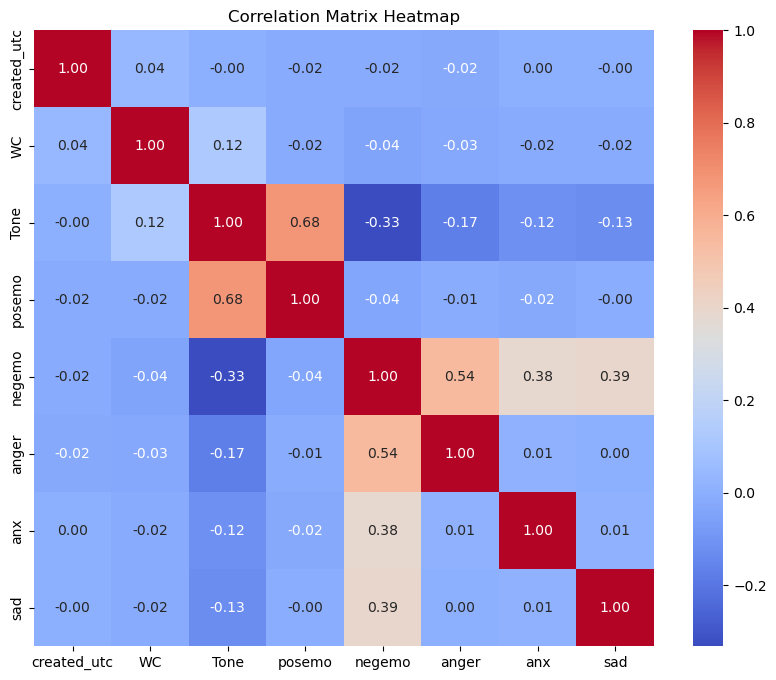

In [69]:
#only using numerical values for heatmap 

df_submissions = df_submissions.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_submissions.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


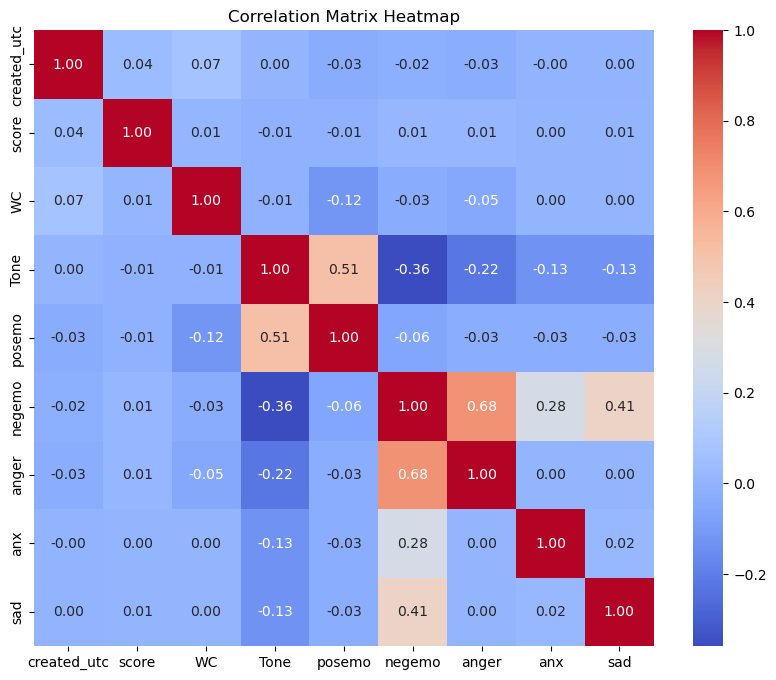

In [32]:
#only using numerical values for heatmap 

df_comments = df_comments.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_comments.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [85]:
#Checking for outliers, using min, max, and unique values for comments dataframe

numerical_df_s = df_submissions.select_dtypes(include=['int', 'float'])

# Iterate through each numerical column
for column in numerical_df_s.columns:
    # Calculate min and max range of unique values
    min_val = numerical_df_s[column].min()
    max_val = numerical_df_s[column].max()
    unique_values = numerical_df_s[column].nunique()
    
    # Print the results
    print(f"{column}, -- Min: {min_val}, -- Max: {max_val}, -- Unique Values: {unique_values}")


created_utc, -- Min: 1561436002.0, -- Max: 1659066615.0, -- Unique Values: 79580
WC, -- Min: 0.0, -- Max: 69.0, -- Unique Values: 70
Tone, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 120
posemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 198
negemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 196
anger, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 126
anx, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 106
sad, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 106


In [86]:
#Checking for outliers, using min, max, and unique values for comments dataframe

numerical_df_c = df_comments.select_dtypes(include=['int', 'float'])

# Iterate through each numerical column
for column in numerical_df_c.columns:
    # Calculate min and max range of unique values
    min_val = numerical_df_c[column].min()
    max_val = numerical_df_c[column].max()
    unique_values = numerical_df_c[column].nunique()
    
    # Print the results
    print(f"{column}, -- Min: {min_val}, -- Max: {max_val}, -- Unique Values: {unique_values}")

created_utc, -- Min: 1561435211, -- Max: 1659067065, -- Unique Values: 1005848
score, -- Min: -105, -- Max: 217, -- Unique Values: 188
WC, -- Min: 0, -- Max: 1935, -- Unique Values: 1049
Tone, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 4364
posemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1264
negemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1267
anger, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 886
anx, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 596
sad, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 618


In [87]:
import datetime
import pandas as pd

# Define the extract_datetime function
def extract_datetime(row):
    timestamp = row['created_utc']
    dt_object = datetime.datetime.fromtimestamp(timestamp)
    return dt_object

# Assuming df_submissions and df_comments are your DataFrames
# Apply the function to each row in df_submissions and create a new column 'Datetime'
df_submissions['Datetime'] = df_submissions.apply(extract_datetime, axis=1)

# Apply the function to each row in df_comments and create a new column 'Datetime'
df_comments['Datetime'] = df_comments.apply(extract_datetime, axis=1)

# Define the bins for the seasons based on days of the year
seasons_bins = [0, 80, 172, 264, 355, 366]
seasons_labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']

# Add the values to the season column for df_submissions
df_submissions['season'] = pd.cut(df_submissions['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)

# Add the values to the season column for df_comments
df_comments['season'] = pd.cut(df_comments['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)

# Drop the 'created_utc' column from both DataFrames if needed
# df_submissions.drop('created_utc', axis=1, inplace=True)
# df_comments.drop('created_utc', axis=1, inplace=True)


In [88]:
#DateTime to get month name and year 
df_submissions['Datetime'] = pd.to_datetime(df_submissions['Datetime'])

# Extract month name and year into separate columns
df_submissions['Month'] = df_submissions['Datetime'].dt.strftime('%B') 
df_submissions['Year'] = df_submissions['Datetime'].dt.strftime('%Y')  

df_comments['Datetime'] = pd.to_datetime(df_comments['Datetime'])

df_comments['Month'] = df_comments['Datetime'].dt.strftime('%B') 
df_comments['Year'] = df_comments['Datetime'].dt.strftime('%Y')  

df_submissions = df_submissions.dropna()
df_comments = df_comments.dropna()


In [89]:
df_comments

,author,created_utc,score,WC,Tone,posemo,negemo,anger,anx,sad,Datetime,season,Month,Year
0,BoofDontShoot,1659067065,1,5,25.77,0.00,0.00,0.00,0.0,0.00,2022-07-28 23:57:45,Summer,July,2022
1,Busy_Background_195,1659067044,1,55,1.00,1.82,5.45,3.64,0.0,1.82,2022-07-28 23:57:24,Summer,July,2022
2,Wolf_Double,1659066949,1,6,99.00,33.33,0.00,0.00,0.0,0.00,2022-07-28 23:55:49,Summer,July,2022
3,Knowagoraaa,1659066905,1,39,73.64,2.56,0.00,0.00,0.0,0.00,2022-07-28 23:55:05,Summer,July,2022
4,Busy_Background_195,1659066875,1,75,2.41,2.67,5.33,0.00,0.0,2.67,2022-07-28 23:54:35,Summer,July,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014392,Virgowitch,1561435458,2,5,99.00,20.00,0.00,0.00,0.0,0.00,2019-06-25 00:04:18,Summer,June,2019
1014393,DrewSkii1010,1561435416,1,9,99.00,11.11,0.00,0.00,0.0,0.00,2019-06-25 00:03:36,Summer,June,2019
1014394,erischilde,1561435383,1,104,43.27,1.92,0.96,0.96,0.0,0.00,2019-06-25 00:03:03,Summer,June,2019
1014395,dingobaybees,1561435314,3,44,25.77,2.27,2.27,0.00,0.0,0.00,2019-06-25 00:01:54,Summer,June,2019


In [90]:
df_submissions

,author,title,created_utc,score,WC,Tone,posemo,negemo,anger,anx,sad,Datetime,season,Month,Year
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,1.659067e+09,1,12.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:50:15,Summer,July,2022
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,1.659065e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:22:43,Summer,July,2022
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,1.659064e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:06:11,Summer,July,2022
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,1.659063e+09,1,13.0,99.00,7.69,0.00,0.00,0.00,0.00,2022-07-28 22:49:43,Summer,July,2022
4,Downtown_Syrup4635,IOP Detox while working 9-5??,1.659061e+09,1,6.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 22:21:57,Summer,July,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79671,Kriskross88,I started nodding in front of my friend last n...,1.561437e+09,6,38.0,1.00,0.00,10.53,2.63,2.63,5.26,2019-06-25 00:32:36,Summer,June,2019
79672,Jupiterjigs1,Best way to use oxy 30s?,1.561437e+09,3,6.0,99.00,16.67,0.00,0.00,0.00,0.00,2019-06-25 00:32:34,Summer,June,2019
79673,FBIintern,Is it me or not many homosexual use Opiates?,1.561437e+09,0,9.0,25.77,0.00,0.00,0.00,0.00,0.00,2019-06-25 00:23:52,Summer,June,2019
79674,AutomaticBrick3,Stamp bags review,1.561436e+09,0,3.0,25.77,0.00,0.00,0.00,0.00,0.00,2019-06-25 00:17:35,Summer,June,2019


In [100]:
#Natural Language Processing for Title columns 

nltk.download('stopwords')
swords = stopwords.words('english')
#Removing the word 'not' to avoid consfusion from negative to positive sentiment
swords.remove('not')

df_submissions['title'] = df_submissions['title'].apply(lambda x: re.sub(r'[^a-zA-Z\d\s.]', '', x.lower()))
df_submissions['title'] = df_submissions['title'].apply(lambda x: x.replace('.', ' '))
df_submissions['title'] = df_submissions['title'].apply(lambda x: ' '.join([t for t in x.split(' ') if (t not in swords) and len(t) > 1]))
df_submissions['title'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amadouyehara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    much tylenol much asking friend actually
1        gabapentinlyricaclonidine telehealth
2      opiates prolonging finishenhancing sex
3           boost oxy high amp save money use
4                        iop detox working 95
Name: title, dtype: object

In [104]:
docs = df_submissions['title'].tolist()

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

print(topic_model.get_topic_info())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

      Topic  Count                                               Name  \
0        -1  24112                             -1_im_take_opiates_ive   
1         0    401                0_addiction_addict_addicted_addicts   
2         1    389               1_opioids_opioid_opiods_opioidopiate   
3         2    359                               2_40mg_20mg_80mg_5mg   
4         3    313                      3_high_anymore_pyramid_folbee   
...     ...    ...                                                ...   
1403   1402     10             1402_nausea_bloated_decreasing_desired   
1404   1403     10  1403_minneapolis_minnesota_lakewooddenver_minn...   
1405   1404     10                            1404_5s_a04_2000_street   
1406   1405     10           1405_8mg_truefalse_malindrockt_dilaudids   
1407   1406     10  1406_hangover_hangoverwithdrawals_hangovers_av...   

                                         Representation  \
0     [im, take, opiates, ive, took, dont, ago, like...   
1    

In [105]:
topic_model.visualize_barchart(top_n_topics=9, n_words=10, width=650, height=650)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [106]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

df_submissions['title_polarity'] = df_submissions['title'].apply(lambda x: round((nlp(x))._.blob.polarity, 2))
df_submissions

,author,title,created_utc,score,WC,Tone,posemo,negemo,anger,anx,sad,Datetime,season,Month,Year,title_polarity
0,Odd-Pizza-1079,much tylenol much asking friend actually,1.659067e+09,1,12.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:50:15,Summer,July,2022,0.13
1,Global_Face_4708,gabapentinlyricaclonidine telehealth,1.659065e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:22:43,Summer,July,2022,0.00
2,Bluebeamtwinfn,opiates prolonging finishenhancing sex,1.659064e+09,1,5.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 23:06:11,Summer,July,2022,0.00
3,iLoveLuckiii,boost oxy high amp save money use,1.659063e+09,1,13.0,99.00,7.69,0.00,0.00,0.00,0.00,2022-07-28 22:49:43,Summer,July,2022,0.16
4,Downtown_Syrup4635,iop detox working 95,1.659061e+09,1,6.0,25.77,0.00,0.00,0.00,0.00,0.00,2022-07-28 22:21:57,Summer,July,2022,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79671,Kriskross88,started nodding front friend last night kept s...,1.561437e+09,6,38.0,1.00,0.00,10.53,2.63,2.63,5.26,2019-06-25 00:32:36,Summer,June,2019,-0.26
79672,Jupiterjigs1,best way use oxy 30s,1.561437e+09,3,6.0,99.00,16.67,0.00,0.00,0.00,0.00,2019-06-25 00:32:34,Summer,June,2019,1.00
79673,FBIintern,not many homosexual use opiates,1.561437e+09,0,9.0,25.77,0.00,0.00,0.00,0.00,0.00,2019-06-25 00:23:52,Summer,June,2019,-0.25
79674,AutomaticBrick3,stamp bags review,1.561436e+09,0,3.0,25.77,0.00,0.00,0.00,0.00,0.00,2019-06-25 00:17:35,Summer,June,2019,0.00


In [107]:
#Main Task #1: Random Forest Calssifier to predict scores based off of positive and negative emotion

#Submissions

# Convert 'score' column to numeric, setting errors='coerce' to convert non-numeric values to NaN
# Then drop rows with NaN in 'score'
df_submissions['score'] = pd.to_numeric(df_submissions['score'], errors='coerce')
df_submissions.dropna(subset=['score'], inplace=True)

#Scores above the median as 'higher'
median_score = df_submissions['score'].median()
df_submissions['higher_score'] = (df_submissions['score'] > median_score).astype(int)
print('Median Score:', median_score)


# Splitting the data
X = df_submissions[['posemo', 'negemo','title_polarity','anger','anx','sad']]
y = df_submissions['higher_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Accruacy Score 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Median Score: 1.0
Accuracy: 0.9196109193598996


In [108]:
#Feature Importance
features = ['posemo', 'negemo','title_polarity','anger','anx','sad']
feature_importances = clf.feature_importances_

# Mapping feature importances
feature_importance_dict = dict(zip(features, feature_importances))

print('Feature Importances:')
for feature, importance in feature_importance_dict.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
posemo: 0.1881
negemo: 0.1710
title_polarity: 0.4782
anger: 0.0692
anx: 0.0405
sad: 0.0530


In [109]:
#Main Task #1: Random Forest Calssifier to predict scores based off of positive and negative emotion

#Comments

# Convert 'score' column to numeric, setting errors='coerce' to convert non-numeric values to null
# Then drop rows with NaN in 'score'
df_comments['score'] = pd.to_numeric(df_comments['score'], errors='coerce')
df_comments.dropna(subset=['score'], inplace=True)

#Scores above the median as 'higher'
median_score = df_comments['score'].median()
df_comments['higher_score'] = (df_comments['score'] > median_score).astype(int)
print('Median Score:', median_score)


# Splitting the data
X = df_comments[['posemo', 'negemo','anger','anx','sad']]
y = df_comments['higher_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Accruacy Score 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Median Score: 1.0
Accuracy: 0.8219045741324921


In [110]:
#Feature Importance
features = ['posemo', 'negemo','anger','anx','sad']
feature_importances = clf.feature_importances_

# Mapping feature importances
feature_importance_dict = dict(zip(features, feature_importances))

print('Feature Importances:')
for feature, importance in feature_importance_dict.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
posemo: 0.3102
negemo: 0.2944
anger: 0.1541
anx: 0.1181
sad: 0.1233


In [25]:
#df_submissions.to_csv('df_submissions.csv', index=False)

In [26]:
#Ignore 

In [32]:

# Normalizing the numeric columns
scaler = MinMaxScaler()
df_submissions[['score_normalized', 'posemo_normalized', 'negemo_normalized', 'title_polarity_normalized']] = scaler.fit_transform(df_submissions[['score', 'posemo', 'negemo', 'title_polarity']])

# Encoding the season column
encoder = OneHotEncoder()
season_encoded = encoder.fit_transform(df_submissions[['season']]).toarray()
season_encoded_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season']))

# Combining the normalized and encoded features
features_df_sub = pd.concat([df_submissions[['score', 'posemo', 'negemo', 'title_polarity']], season_encoded_df], axis=1)
features_df_sub.head()

,score,posemo,negemo,title_polarity,season_Fall,season_Spring,season_Summer,season_Winter
0,1.0,0.00,0.0,0.13,0.0,0.0,1.0,0.0
1,1.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0
2,1.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0
3,1.0,7.69,0.0,0.16,0.0,0.0,1.0,0.0
4,1.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0


In [37]:
features_df_sub = features_df_sub.dropna()

In [35]:
df_submissions = df_submissions.dropna()

In [39]:
df_submissions.head()

,author,title,Datetime,season,score,WC,Tone,posemo,negemo,title_polarity,higher_score,score_normalized,posemo_normalized,negemo_normalized,title_polarity_normalized
0,Odd-Pizza-1079,much tylenol much asking friend actually,2022-07-28 23:50:15,Summer,1,12.0,25.77,0.00,0.0,0.13,0,0.001953,0.0000,0.0,0.565
1,Global_Face_4708,gabapentinlyricaclonidine telehealth,2022-07-28 23:22:43,Summer,1,5.0,25.77,0.00,0.0,0.00,0,0.001953,0.0000,0.0,0.500
2,Bluebeamtwinfn,opiates prolonging finishenhancing sex,2022-07-28 23:06:11,Summer,1,5.0,25.77,0.00,0.0,0.00,0,0.001953,0.0000,0.0,0.500
3,iLoveLuckiii,boost oxy high amp save money use,2022-07-28 22:49:43,Summer,1,13.0,99.00,7.69,0.0,0.16,0,0.001953,0.0769,0.0,0.580
4,Downtown_Syrup4635,iop detox working 95,2022-07-28 22:21:57,Summer,1,6.0,25.77,0.00,0.0,0.00,0,0.001953,0.0000,0.0,0.500


In [30]:
'''
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(features_df_sub)

# Adding cluster labels to the dataframe
df_submissions['Cluster'] = clusters


# Plotting the clusters
plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(features_df_sub['Datetime'], df_submissions['score'], c=features_df_sub['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Cluster Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.colorbar(label='Cluster')
plt.show()
print('Clustering complete. Clusters are visualized based on the score over time.')
'''


"\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\n\n# Applying K-Means Clustering\nkmeans = KMeans(n_clusters=4, random_state=0)\nclusters = kmeans.fit_predict(features_df_sub)\n\n# Adding cluster labels to the dataframe\ndf_submissions['Cluster'] = clusters\n\n\n# Plotting the clusters\nplt.figure(figsize=(10, 6), facecolor='white')\nplt.scatter(features_df_sub['Datetime'], df_submissions['score'], c=features_df_sub['Cluster'], cmap='viridis', alpha=0.5)\nplt.title('Cluster Distribution Over Time')\nplt.xlabel('Date')\nplt.ylabel('Score')\nplt.colorbar(label='Cluster')\nplt.show()\nprint('Clustering complete. Clusters are visualized based on the score over time.')\n"

In [31]:

# Visualizing the clusters using a scatter plot

season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'yellow', 'Fall': 'red'}
season_color_values = df_submissions['season'].map(season_colors)
plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(df_submissions['posemo'], df_submissions['negemo'], c=df_submissions['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters of Posts Based on Normalized Emotional Scores')
plt.xlabel('Normalized Positive Emotion Score')
plt.ylabel('Normalized Negative Emotion Score')
plt.colorbar(label='Cluster')
plt.show()
print('Scatter plot of clusters based on normalized emotional scores displayed.')


KeyError: 'Cluster'

<Figure size 1000x600 with 0 Axes>